# Image Data Augmentation with Keras
Data augmentation is a strategy that enables to increase the amount of training data using information available from existing training data. To get better generalization in your model you need more data and as much variation possible in the data. Sometimes, dataset is not big enough to capture enough variation, in such cases we need to generate more data from given dataset. That is were Data Augmentation can play a very important role.

![Horizontal Flip](assets/horizontal_flip.jpg)

# Import Libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.0.0


# Check the original image

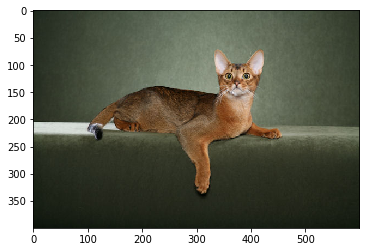

In [7]:
image_path = 'images/train/cat/cat.jpg'
plt.imshow(plt.imread(image_path))

# Let's get started Data Augmentation

# Rotation

In [2]:
#rotation_range=40, it can be rotated -40 to +40
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40
)

Found 1 images belonging to 1 classes.


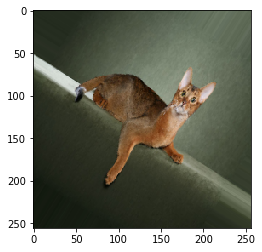

In [10]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Width and Height Shifts

In [11]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-40, -20, 0, 20, 40],
    height_shift_range=[-50, 50]
)

Found 1 images belonging to 1 classes.


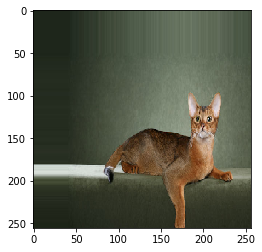

In [12]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'))

# Brightness

In [19]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0., 2.)
)

Found 1 images belonging to 1 classes.


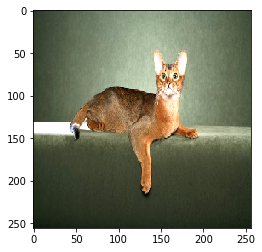

In [20]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'))

# Zoom

In [21]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.5
)

Found 1 images belonging to 1 classes.


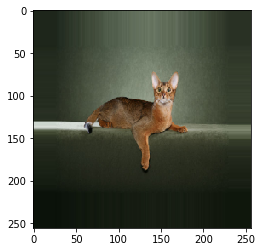

In [26]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'))

# Channel Shift
RGB channels

In [27]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=100
)

Found 1 images belonging to 1 classes.


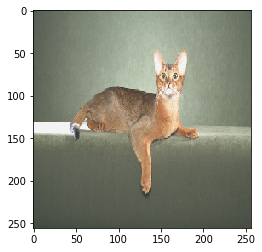

In [28]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'))

# Flips

In [30]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
)

Found 1 images belonging to 1 classes.


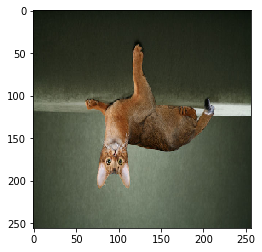

In [31]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Normalization

#### Featurewise

In [33]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
)

generator.fit(x_train)

170500096/170498071 [==============================] - 163s 1us/step


#### Samplewise

In [34]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

-1.16725765e-07 1.0 [[2]]


# Rescale and Preprocessing Function

In [35]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rescale=1.
)

In [36]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

0.052821208 0.3403464 [[2]]


# Using in Model Training

In [37]:
#Can be added more layers
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, input_shape=(32, 32, 3), pooling='avg'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

E:\Anaconda Program Data\Program Data\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 9s 1us/step


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 2,270,794
Trainable params: 2,236,682
Non-trainable params: 34,112
_________________________________________________________________


In [48]:
model.fit(
    generator.flow(x_train, y_train, batch_size=32),
    steps_per_epoch=10, epochs=10,
    validation_data=(x_test, y_test), verbose=1
)

Train for 10 steps, validate on 10000 samples
Epoch 1/10
10/10 [==============================] - 50s 5s/step - loss: 1.9195 - accuracy: 0.3906 - val_loss: 8.2332 - val_accuracy: 0.1065
Epoch 2/10
10/10 [==============================] - 33s 3s/step - loss: 1.9651 - accuracy: 0.3625 - val_loss: 5.8984 - val_accuracy: 0.1301
Epoch 3/10
10/10 [==============================] - 31s 3s/step - loss: 1.7223 - accuracy: 0.4031 - val_loss: 6.7119 - val_accuracy: 0.1258
Epoch 4/10
10/10 [==============================] - 31s 3s/step - loss: 1.7925 - accuracy: 0.3875 - val_loss: 5.3809 - val_accuracy: 0.1407
Epoch 5/10
10/10 [==============================] - 30s 3s/step - loss: 1.7683 - accuracy: 0.3844 - val_loss: 5.4199 - val_accuracy: 0.1262
Epoch 6/10
10/10 [==============================] - 30s 3s/step - loss: 1.7564 - accuracy: 0.3938 - val_loss: 7.1826 - val_accuracy: 0.1088
Epoch 7/10
10/10 [==============================] - 30s 3s/step - loss: 1.8086 - accuracy: 0.4156 - val_loss: 9.05

In [51]:
import pandas as pd
model_loss = pd.DataFrame(model.history.history)

In [53]:
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,1.919516,0.390625,8.233196,0.1065
1,1.965109,0.362500,5.898351,0.1301
2,1.722309,0.403125,6.711920,0.1258
3,1.792453,0.387500,5.380855,0.1407
4,1.768255,0.384375,5.419930,0.1262


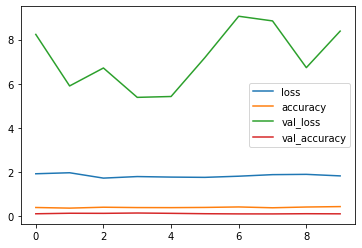

In [54]:
model_loss.plot()

# Conclusion 
    Main goal is to learn about Image Data Agumenation not build a perfect model.
    Enjoy the project.